<a href="https://www.kaggle.com/code/minseo14/arc-task-00d62c1b-with-cnn?scriptVersionId=189140754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ARC Task 00d62c1b with CNN!
> ### Models in this page are specialized only for the single data, 00d62c1b. 
> ### Still a necessary step though!

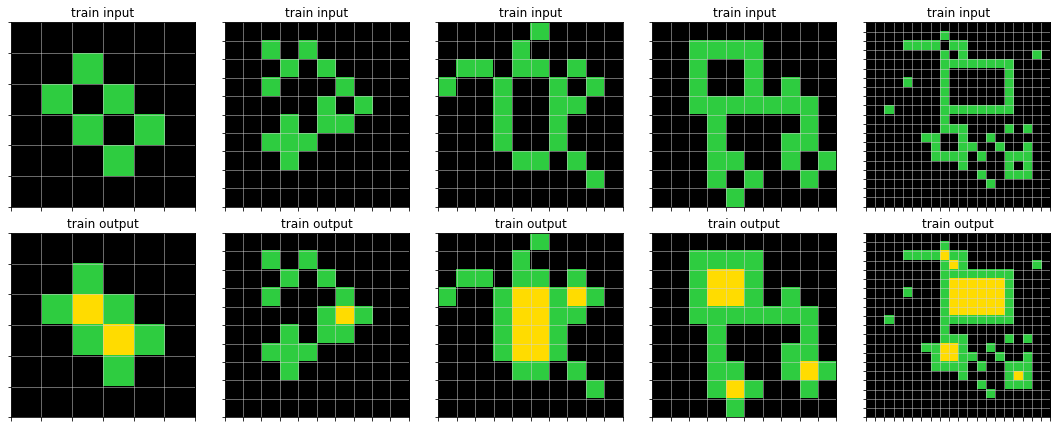

## Abastract
    CNNs seems have a limitation to detect all borders without long term memory.
### Next Step 
    Apply boundary fill algorithm from the border of the image detecting nearby pixels having the same color. 
    Then detect the significant rest pixels

### Extention (To aproach end-to-end)
    Classify whether the shape is stable or not.
    Predict what kind of pattern/roles each task/color has.
    
### Citation of code
> [Basic Attention Model - deep-learning-from-scratch-2](https://github.com/oreilly-japan/deep-learning-from-scratch-2/tree/master/ch08)

---

# Step 0: Setup

## 0-1. Install Libraries and Import Modules

> ### Add Path

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arcsourcecode/data.py
/kaggle/input/arcsourcecode/train.py
/kaggle/input/arcsourcecode/test.py
/kaggle/input/arcsourcecode/constants.py
/kaggle/input/arcsourcecode/classify.py
/kaggle/input/arcsourcecode/2_00d62c1b.png
/kaggle/input/arcsourcecode/utils/analyze.py
/kaggle/input/arcsourcecode/utils/lightning_custom.py
/kaggle/input/arcsourcecode/utils/visualize.py
/kaggle/input/arcsourcecode/configs/train.yaml
/kaggle/input/arcsourcecode/configs/test.yaml
/kaggle/input/arcsourcecode/configs/model/ShapeStableSolverIgnoreColor.yaml
/kaggle/input/arcsourcecode/configs/model/ShapeStableSolver.yaml
/kaggle/input/arcsourcecode/configs/data/ShapeStableSolverIgnoreColor_test.yaml
/kaggle/input/arcsourcecode/configs/data/ShapeStableSolver_train.yaml
/kaggle/input/arcsourcecode/configs/data/train.yaml
/kaggle/input/arcsourcecode/configs/data/ShapeStableSolverIgnoreColor_train.yaml
/kaggle/input/arcsourcecode/configs/data/ShapeStableSolver_test.yaml
/kaggle/input/arcsourcecode/configs

In [2]:
import sys
sys.path.insert(1, '/kaggle/input/arcsourcecode')

> ### Install Hydra

In [3]:
!pip install hydra-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=5f95d633b6a54bcf4becea2a62bf7f1551c1d3b9703d8dff256ad7a3b3370296
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


> ### Load Config Files and Train/Test Functions

In [4]:
from omegaconf import OmegaConf
from train import train
from test import test

In [5]:
base_path = '/kaggle/input/arc-prize-2024/'
config_path = '/kaggle/input/arcsourcecode/configs/'

def load_config(path, config_path=config_path):
    return OmegaConf.load(config_path + path)

def load_train_config(ignore_color=False):
    if ignore_color:
        # Hyperparameters for Training
        config_data = load_config("data/ShapeStableSolverIgnoreColor_train.yaml")
        config_model = load_config("model/ShapeStableSolverIgnoreColor.yaml")
        config_train = load_config("train/default.yaml")
        config_train_default = OmegaConf.load(config_path + "train.yaml")
    else:
        # Hyperparameters for Training
        config_data = load_config("data/ShapeStableSolver_train.yaml")
        config_model = load_config("model/ShapeStableSolver.yaml")
        config_train = load_config("train/default.yaml")
        config_train_default = OmegaConf.load(config_path + "train.yaml")
        
    config_train = OmegaConf.merge({'data': config_data, 'model': config_model, 'train': config_train, **config_train_default})

    config_train.data.params.base_path = '/kaggle/input/arc-prize-2024/'
    config_train.save_path = './output/'
    
    return config_train

def load_test_config(train=False, ignore_color=False):
    if ignore_color:
        # Hyperparameters for Testing
        config_data = load_config("data/ShapeStableSolverIgnoreColor_test.yaml")
        config_model = load_config("model/ShapeStableSolverIgnoreColor.yaml")
        config_test_default = load_config("test.yaml")
        config_test = OmegaConf.merge({'data': config_data, 'model': config_model, **config_test_default})
    else:
        # Hyperparameters for Testing
        config_data = load_config("data/ShapeStableSolver_test.yaml")
        config_model = load_config("model/ShapeStableSolver.yaml")
        config_test_default = load_config("test.yaml")
    
    config_test = OmegaConf.merge({'data': config_data, 'model': config_model, **config_test_default})
    config_test.data.params.base_path = '/kaggle/input/arc-prize-2024/'
    
    return config_test

## 0-2. Data Augmentation (Rotation, Flipping)

Data size: 1

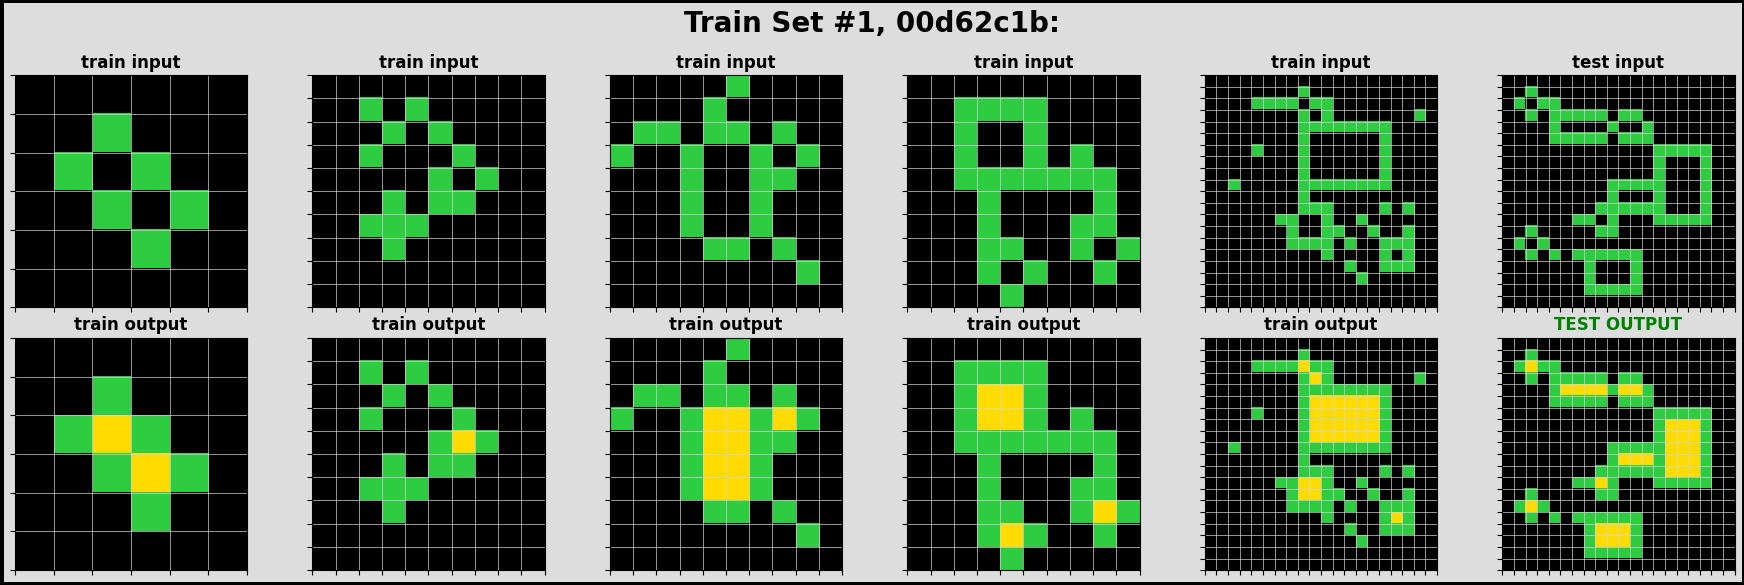

In [6]:
from rich import print
from data import ARCDataset
from constants import get_challenges_solutions_filepath
from classify import ARCDataClassifier
from utils.visualize import plot_task


data_category = 'train'
challenges, solutions = get_challenges_solutions_filepath(data_category, base_path)

# Filtering Dataset
filter_funcs = (
    ARCDataClassifier.in_data_codes_f(['00d62c1b']),
#     ARCDataClassifier.is_same_shape_f(True),
#     ARCDataClassifier.is_n_m_colored_in_out_f(2, 3),
#     ARCDataClassifier.is_dominent_color_stable_f(True),
)

dataset_train = ARCDataset(challenges, solutions, train=True, one_hot=False, filter_funcs=filter_funcs)
dataset_test = ARCDataset(challenges, solutions, train=False, one_hot=False, filter_funcs=filter_funcs)
print(f'Data size: {len(dataset_train)}')

# Visualize a task
for index in range(len(dataset_train)):
    plot_task(dataset_train, dataset_test, index, data_category)
    break

Data size: 1

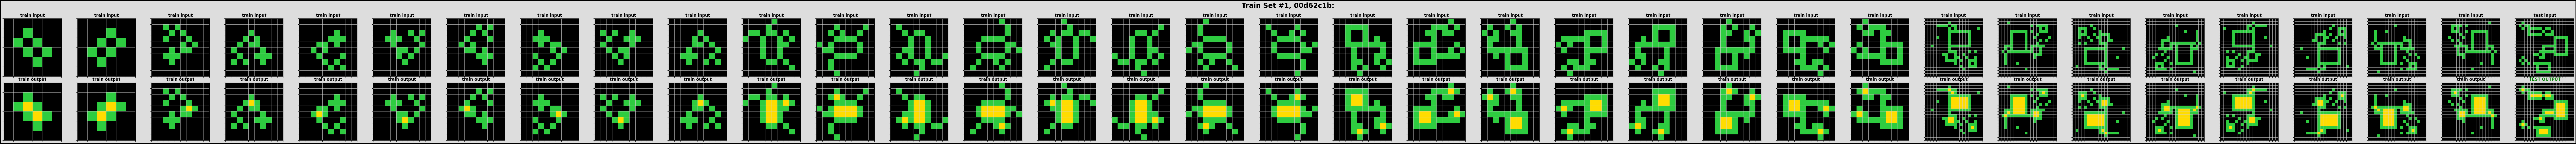

In [7]:
dataset_train = ARCDataset(challenges, solutions, train=True, one_hot=False, filter_funcs=filter_funcs, augment_data=True)
print(f'Data size: {len(dataset_train)}')

# Visualize a task
for index in range(len(dataset_train)):
    plot_task(dataset_train, dataset_test, index, data_category='Train')
    break

# Step 1: Consider which pixel to be substituted

## 1-1. Predict the positions to be substituted

In [8]:
config = load_train_config(ignore_color=True)
train(config)

data:
  name: ShapeStableSolverIgnoreColor
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: true
    ignore_color: true
model:
  name: ShapeStableSolverIgnoreColor
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 128
    - 32
train:
  name: default
  params:
    epoch: 50
    lr: 0.01
defaults:
- data: ShapeStableSolver_train
- model: ShapeStableSolver
- train: default
save_path: ./output/

2024-07-21 07:32:39.774041: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-21 07:32:39.774256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-21 07:32:39.958575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type                         ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model          │ ShapeStableSolverIgnoreColor │ 98.6 K │ train │
│ 1 │ loss_fn_source │ BCEWithLogitsLoss            │      0 │ train │
└───┴────────────────┴──────────────────────────────┴────────┴───────┘

Trainable params: 98.6 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 98.6 K                                                                                               
Total estimated model params size (MB): 0

Output()

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/instancenorm.py:80: UserWarning: input's size at dim=1 
does not match num_features. You can silence this warning by not passing in num_features, which is not used because
affine=False
  warnings.warn(f"input's size at dim={feature_dim} does not match num_features. "

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.


Train loss: 23.038345, N Pixels Wrong: 1404

Train loss: 20.419498, N Pixels Wrong: 403

Train loss: 19.739033, N Pixels Wrong: 390

Train loss: 19.175705, N Pixels Wrong: 130

Train loss: 18.899494, N Pixels Wrong: 95

Train loss: 19.047955, N Pixels Wrong: 150

Train loss: 18.864569, N Pixels Wrong: 36

Train loss: 18.836433, N Pixels Wrong: 56

Train loss: 18.739332, N Pixels Wrong: 11

Train loss: 18.712605, N Pixels Wrong: 12

Train loss: 18.701500, N Pixels Wrong: 3

Train loss: 18.700037, N Pixels Wrong: 4

Train loss: 18.695799, N Pixels Wrong: 0

Train loss: 18.695013, N Pixels Wrong: 0

Train loss: 18.694073, N Pixels Wrong: 0

Train loss: 18.693626, N Pixels Wrong: 0

Train loss: 18.693531, N Pixels Wrong: 0

Train loss: 18.693342, N Pixels Wrong: 0

Train loss: 18.693127, N Pixels Wrong: 0

Train loss: 18.692940, N Pixels Wrong: 0

Train loss: 18.692856, N Pixels Wrong: 0

Train loss: 18.692738, N Pixels Wrong: 0

Train loss: 18.692682, N Pixels Wrong: 0

Train loss: 18.692713, N Pixels Wrong: 0

Train loss: 18.692781, N Pixels Wrong: 0

Train loss: 18.692877, N Pixels Wrong: 0

Train loss: 18.693096, N Pixels Wrong: 0

Train loss: 18.692976, N Pixels Wrong: 0

Train loss: 18.692877, N Pixels Wrong: 0

Train loss: 18.692646, N Pixels Wrong: 0

Train loss: 18.692646, N Pixels Wrong: 0

Train loss: 18.692476, N Pixels Wrong: 0

Train loss: 18.692453, N Pixels Wrong: 0

Train loss: 18.692513, N Pixels Wrong: 0

Train loss: 18.692360, N Pixels Wrong: 0

Train loss: 18.692474, N Pixels Wrong: 0

Train loss: 18.692669, N Pixels Wrong: 0

Train loss: 18.692444, N Pixels Wrong: 0

Train loss: 18.692791, N Pixels Wrong: 0

Train loss: 18.693396, N Pixels Wrong: 0

Train loss: 18.693094, N Pixels Wrong: 0

Train loss: 18.694174, N Pixels Wrong: 0

Train loss: 18.695227, N Pixels Wrong: 0

Train loss: 18.694677, N Pixels Wrong: 0

Train loss: 18.714233, N Pixels Wrong: 11

Train loss: 18.754122, N Pixels Wrong: 23

Train loss: 18.758867, N Pixels Wrong: 16

Train loss: 18.829933, N Pixels Wrong: 41

Train loss: 19.761602, N Pixels Wrong: 315

Train loss: 21.013002, N Pixels Wrong: 792

Seed used 2379246707984382536

Model saved to: ./output//model_ShapeStableSolverIgnoreColor.pth

ShapeStableSolverIgnoreColorL(
  (model): ShapeStableSolverIgnoreColor(
    (feature_extractor): ConvFeatureExtractor(
      (encoder): Conv2dEncoderLayer(
        (conv): Conv2dFixedKernel(1, 512, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=512, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (extender): Conv2dEncoderLayer(
        (conv): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=128, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (decoder): Conv2dEncoderLayer(
        (conv): Conv2d(32, 128, kernel_size=(3, 3),

data:
  name: ShapeStableSolverIgnoreColor
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: false
    ignore_color: true
model:
  name: ShapeStableSolverIgnoreColor
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 128
    - 32
defaults:
- data: ShapeStableSolver_test
- model: ShapeStableSolver
- train: default
model_path: ./output/model_ShapeStableSolverIgnoreColor.pth
verbose_single: false

Task: 00d62c1b, index: 1, correct 0.0%, N Pixels Wrong: 36

Task: 00d62c1b, index: 2, correct 0.0%, N Pixels Wrong: 100

Task: 00d62c1b, index: 3, correct 0.0%, N Pixels Wrong: 100

Task: 00d62c1b, index: 4, correct 0.0%, N Pixels Wrong: 100

Task: 00d62c1b, index: 5, correct 0.0%, N Pixels Wrong: 400

Task: 00d62c1b, index: 6, correct 0.0%, N Pixels Wrong: 400

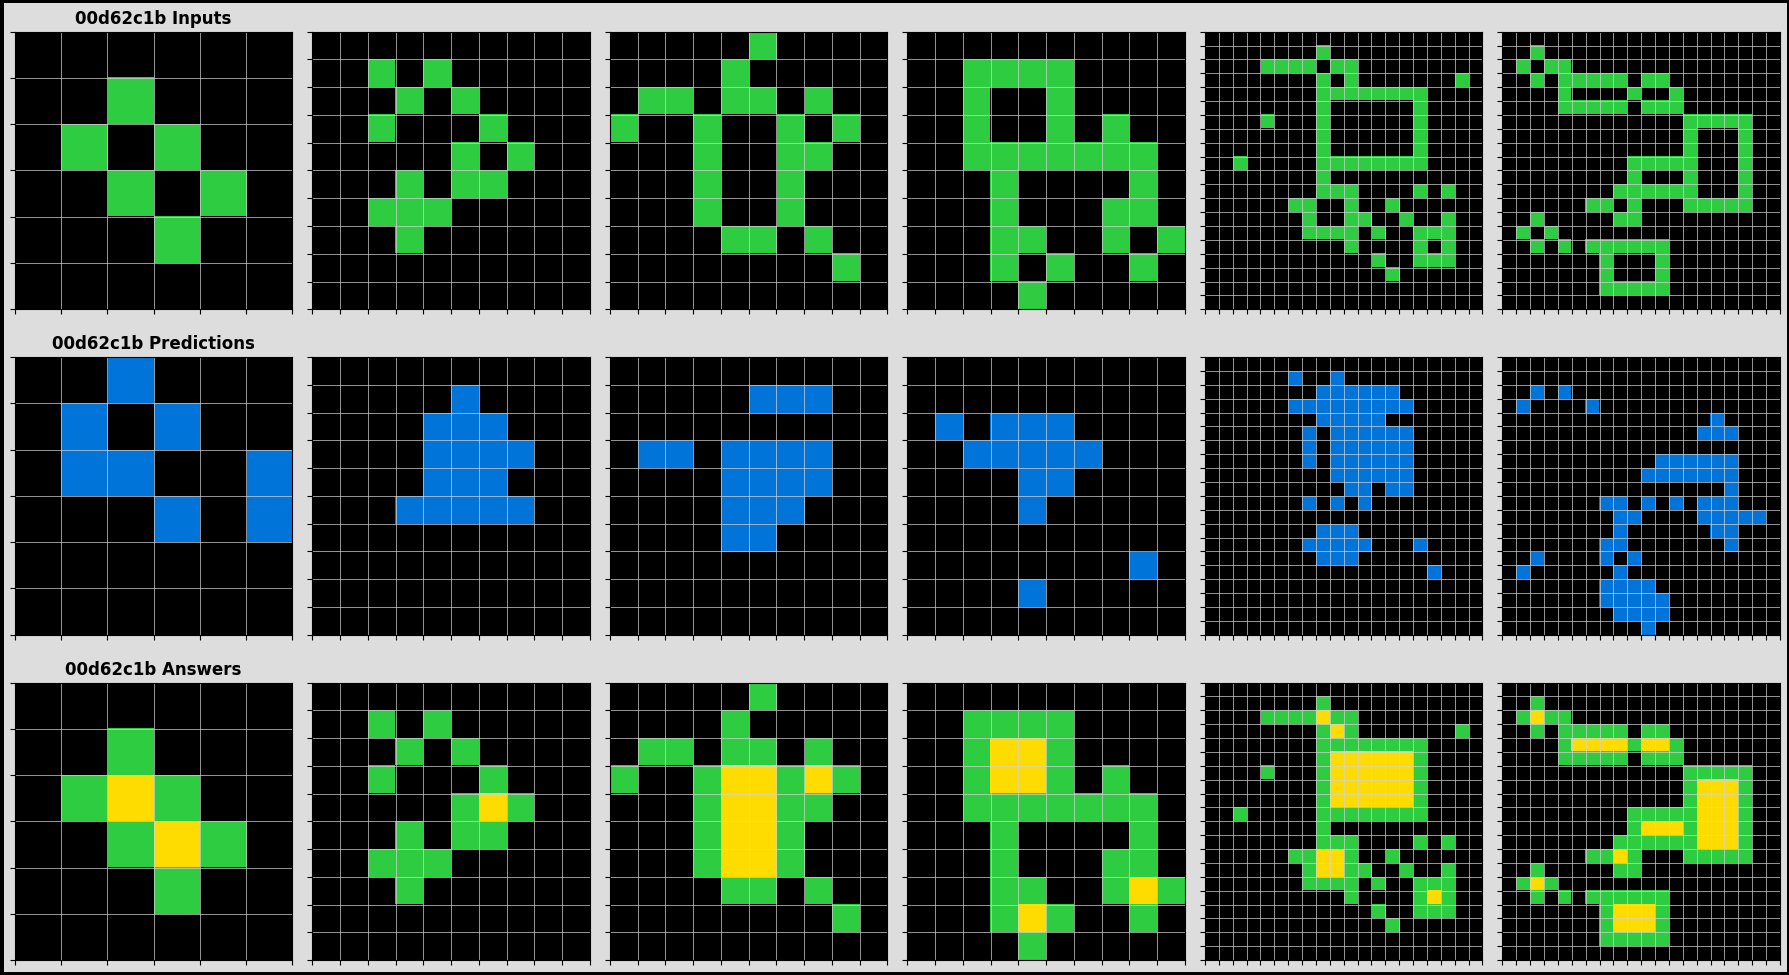

In [9]:
config = load_test_config(ignore_color=True)
config.model_path = './output/model_ShapeStableSolverIgnoreColor.pth'
test(config)

# Step 2: Consider pixel colors as well

## 2-1. Predict pixels to be kept

In [10]:
import torch
from torch import nn


class ShapeStableSolver(nn.Module):
    def __init__(self, pad_value=-1, reduced_channels_encoder=[512, 32], reduced_channels_decoder=[128, 32], hidden_size=1, num_classes=10, feature_dim=1, color_dim=1):
        super().__init__()
        self.color_vector = nn.Parameter(torch.randn(num_classes, feature_dim)) # dim-1 because the first channel is the input

        self.attn_input = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=num_classes, nhead=1, dim_feedforward=1, batch_first=True, bias=False),
            num_layers=1,
        )

        self.decoder = nn.Sequential(
            nn.Linear(color_dim, 1, bias=False),
        )

    def forward(self, x):
        N, C, H, W = x.shape

        y = self.color_vector.repeat(N*H*W, 1, 1) # [N*H*W, C, V]
        V = y.shape[2]
        y = y.transpose(2, 1) # [N*H*W, V, C]

        x = x.permute(0, 2, 3, 1).reshape(N*H*W, 1, C).repeat(1, V, 1) # [N*H*W, V, C]
        y = self.attn_input(y, x)
        y = y.transpose(2, 1) # [N*H*W, C, V]

        y = y.reshape(N*H*W*C, V)
        y = self.decoder(y) # [N*H*W*C, 1]
        y = y.view(N, H, W, C).permute(0, 3, 1, 2) # [N, C, H, W]

        return y

data:
  name: ShapeStableSolver
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: true
    ignore_color: false
model:
  name: ShapeStableSolver
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 32
    - 32
train:
  name: default
  params:
    epoch: 20
    lr: 0.01
defaults:
- data: ShapeStableSolver_train
- model: ShapeStableSolver
- train: default
save_path: ./output/

┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type              ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model          │ ShapeStableSolver │    861 │ train │
│ 1 │ loss_fn_source │ BCEWithLogitsLoss │      0 │ train │
└───┴────────────────┴───────────────────┴────────┴───────┘

Trainable params: 861                                                                                              
Non-trainable params: 0                                                                                            
Total params: 861                                                                                                  
Total estimated model params size (MB): 0

Output()

Train loss: 20.329987, N Pixels Wrong: 1128

Train loss: 16.257286, N Pixels Wrong: 515

Train loss: 12.575506, N Pixels Wrong: 506

Train loss: 7.647762, N Pixels Wrong: 516

Train loss: 4.872298, N Pixels Wrong: 514

Train loss: 3.797868, N Pixels Wrong: 501

Train loss: 3.189500, N Pixels Wrong: 487

Train loss: 2.860350, N Pixels Wrong: 484

Train loss: 2.700214, N Pixels Wrong: 505

Train loss: 2.515388, N Pixels Wrong: 491

Train loss: 2.379795, N Pixels Wrong: 476

Train loss: 2.383373, N Pixels Wrong: 519

Train loss: 2.266573, N Pixels Wrong: 490

Train loss: 2.277350, N Pixels Wrong: 517

Train loss: 2.192831, N Pixels Wrong: 484

Train loss: 2.190345, N Pixels Wrong: 489

Train loss: 2.131977, N Pixels Wrong: 474

Train loss: 2.124826, N Pixels Wrong: 491

Train loss: 2.119633, N Pixels Wrong: 496

Train loss: 2.122678, N Pixels Wrong: 501

Seed used 8348298383855982606

Model saved to: ./output//model_ShapeStableSolver.pth

Task: 00d62c1b, index: 1, correct 94.44444274902344%, N Pixels Wrong: 2

Task: 00d62c1b, index: 2, correct 99.0%, N Pixels Wrong: 1

Task: 00d62c1b, index: 3, correct 91.0%, N Pixels Wrong: 9

Task: 00d62c1b, index: 4, correct 94.0%, N Pixels Wrong: 6

Task: 00d62c1b, index: 5, correct 92.25%, N Pixels Wrong: 31

Task: 00d62c1b, index: 6, correct 91.75%, N Pixels Wrong: 33

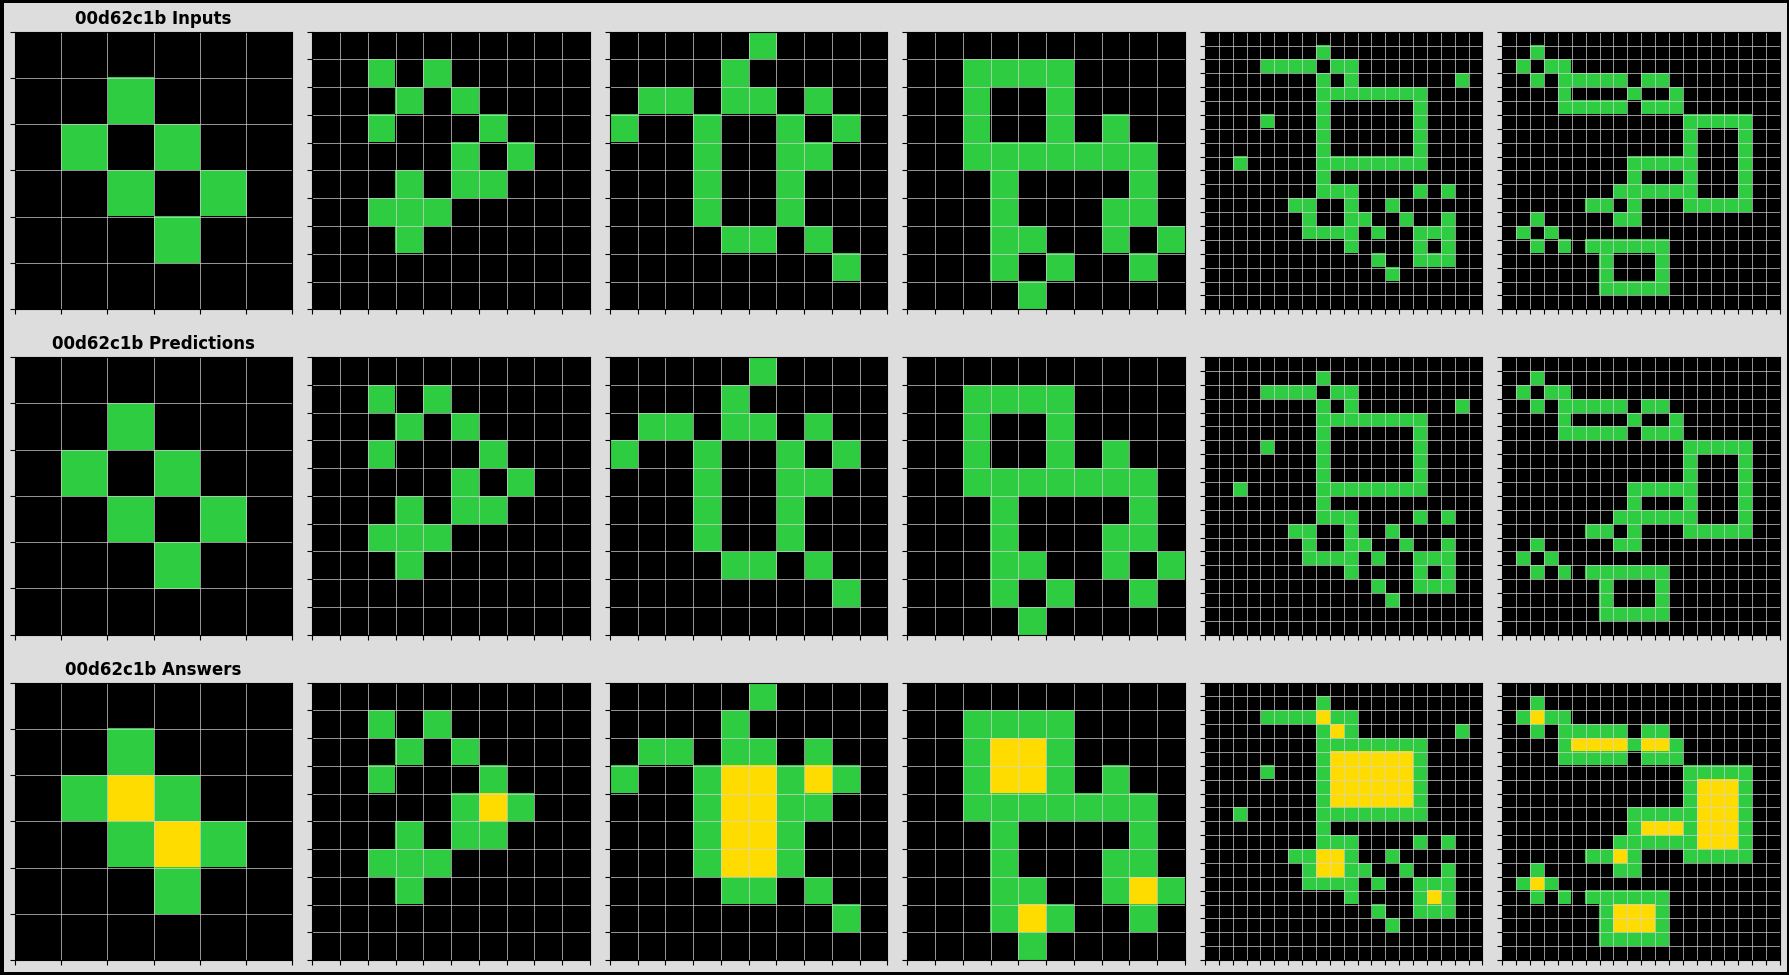

In [11]:
config = load_train_config()
config.train.params.epoch = 20
model = train(config, ShapeStableSolver) # Apply custom model

config = load_test_config()
test(config, model)

## 2-2. Predict which pixels to be kept and replaced by which color

In [12]:
config = load_train_config()
train(config)

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


data:
  name: ShapeStableSolver
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: true
    ignore_color: false
model:
  name: ShapeStableSolver
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 32
    - 32
train:
  name: default
  params:
    epoch: 50
    lr: 0.01
defaults:
- data: ShapeStableSolver_train
- model: ShapeStableSolver
- train: default
save_path: ./output/

┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type              ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model          │ ShapeStableSolver │ 31.8 K │ train │
│ 1 │ loss_fn_source │ BCEWithLogitsLoss │      0 │ train │
└───┴────────────────┴───────────────────┴────────┴───────┘

Trainable params: 31.8 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 31.8 K                                                                                               
Total estimated model params size (MB): 0

Output()

Train loss: 16.529657, N Pixels Wrong: 681

Train loss: 11.138121, N Pixels Wrong: 380

Train loss: 8.432176, N Pixels Wrong: 380

Train loss: 6.645253, N Pixels Wrong: 378

Train loss: 5.319945, N Pixels Wrong: 374

Train loss: 4.308870, N Pixels Wrong: 358

Train loss: 3.653628, N Pixels Wrong: 322

Train loss: 3.087511, N Pixels Wrong: 303

Train loss: 2.724936, N Pixels Wrong: 281

Train loss: 2.381052, N Pixels Wrong: 276

Train loss: 2.033482, N Pixels Wrong: 240

Train loss: 1.770027, N Pixels Wrong: 220

Train loss: 1.577556, N Pixels Wrong: 194

Train loss: 1.404675, N Pixels Wrong: 167

Train loss: 1.236826, N Pixels Wrong: 149

Train loss: 1.160241, N Pixels Wrong: 136

Train loss: 1.058295, N Pixels Wrong: 121

Train loss: 0.930236, N Pixels Wrong: 79

Train loss: 0.906304, N Pixels Wrong: 130

Train loss: 0.804639, N Pixels Wrong: 94

Train loss: 0.693526, N Pixels Wrong: 58

Train loss: 0.661575, N Pixels Wrong: 54

Train loss: 0.688488, N Pixels Wrong: 75

Train loss: 0.524048, N Pixels Wrong: 20

Train loss: 0.445752, N Pixels Wrong: 9

Train loss: 0.431899, N Pixels Wrong: 20

Train loss: 0.716695, N Pixels Wrong: 128

Train loss: 0.529638, N Pixels Wrong: 71

Train loss: 0.438979, N Pixels Wrong: 42

Train loss: 0.395082, N Pixels Wrong: 29

Train loss: 0.328222, N Pixels Wrong: 18

Train loss: 0.294389, N Pixels Wrong: 5

Train loss: 0.279845, N Pixels Wrong: 6

Train loss: 0.264837, N Pixels Wrong: 4

Train loss: 0.247678, N Pixels Wrong: 3

Train loss: 0.236655, N Pixels Wrong: 3

Train loss: 0.223266, N Pixels Wrong: 3

Train loss: 0.210036, N Pixels Wrong: 1

Train loss: 0.201317, N Pixels Wrong: 1

Train loss: 0.191445, N Pixels Wrong: 1

Train loss: 0.182825, N Pixels Wrong: 0

Train loss: 0.174263, N Pixels Wrong: 0

Train loss: 0.166759, N Pixels Wrong: 0

Train loss: 0.159888, N Pixels Wrong: 0

Train loss: 0.153631, N Pixels Wrong: 0

Train loss: 0.147311, N Pixels Wrong: 0

Train loss: 0.141702, N Pixels Wrong: 0

Train loss: 0.136340, N Pixels Wrong: 0

Train loss: 0.131307, N Pixels Wrong: 0

Train loss: 0.126462, N Pixels Wrong: 0

Seed used 7575368967814760716

Model saved to: ./output//model_ShapeStableSolver.pth

ShapeStableSolverL(
  (model): ShapeStableSolver(
    (feature_extractor): ConvSameColorFeatureExtractor(
      (encoder): Conv2dEncoderLayer(
        (conv): Conv2dFixedKernel(1, 512, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=512, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (extender): Conv2dEncoderLayer(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=32, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (attn_reduction): ReductiveAttention(
        (attention_weight_layer): AttentionWeight()
       

data:
  name: ShapeStableSolver
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: false
    ignore_color: false
model:
  name: ShapeStableSolver
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 32
    - 32
defaults:
- data: ShapeStableSolver_test
- model: ShapeStableSolver
- train: default
model_path: ./output/model_ShapeStableSolver.pth
verbose_single: false

Task: 00d62c1b, index: 1, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 2, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 3, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 4, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 5, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 6, correct 97.25%, N Pixels Wrong: 11

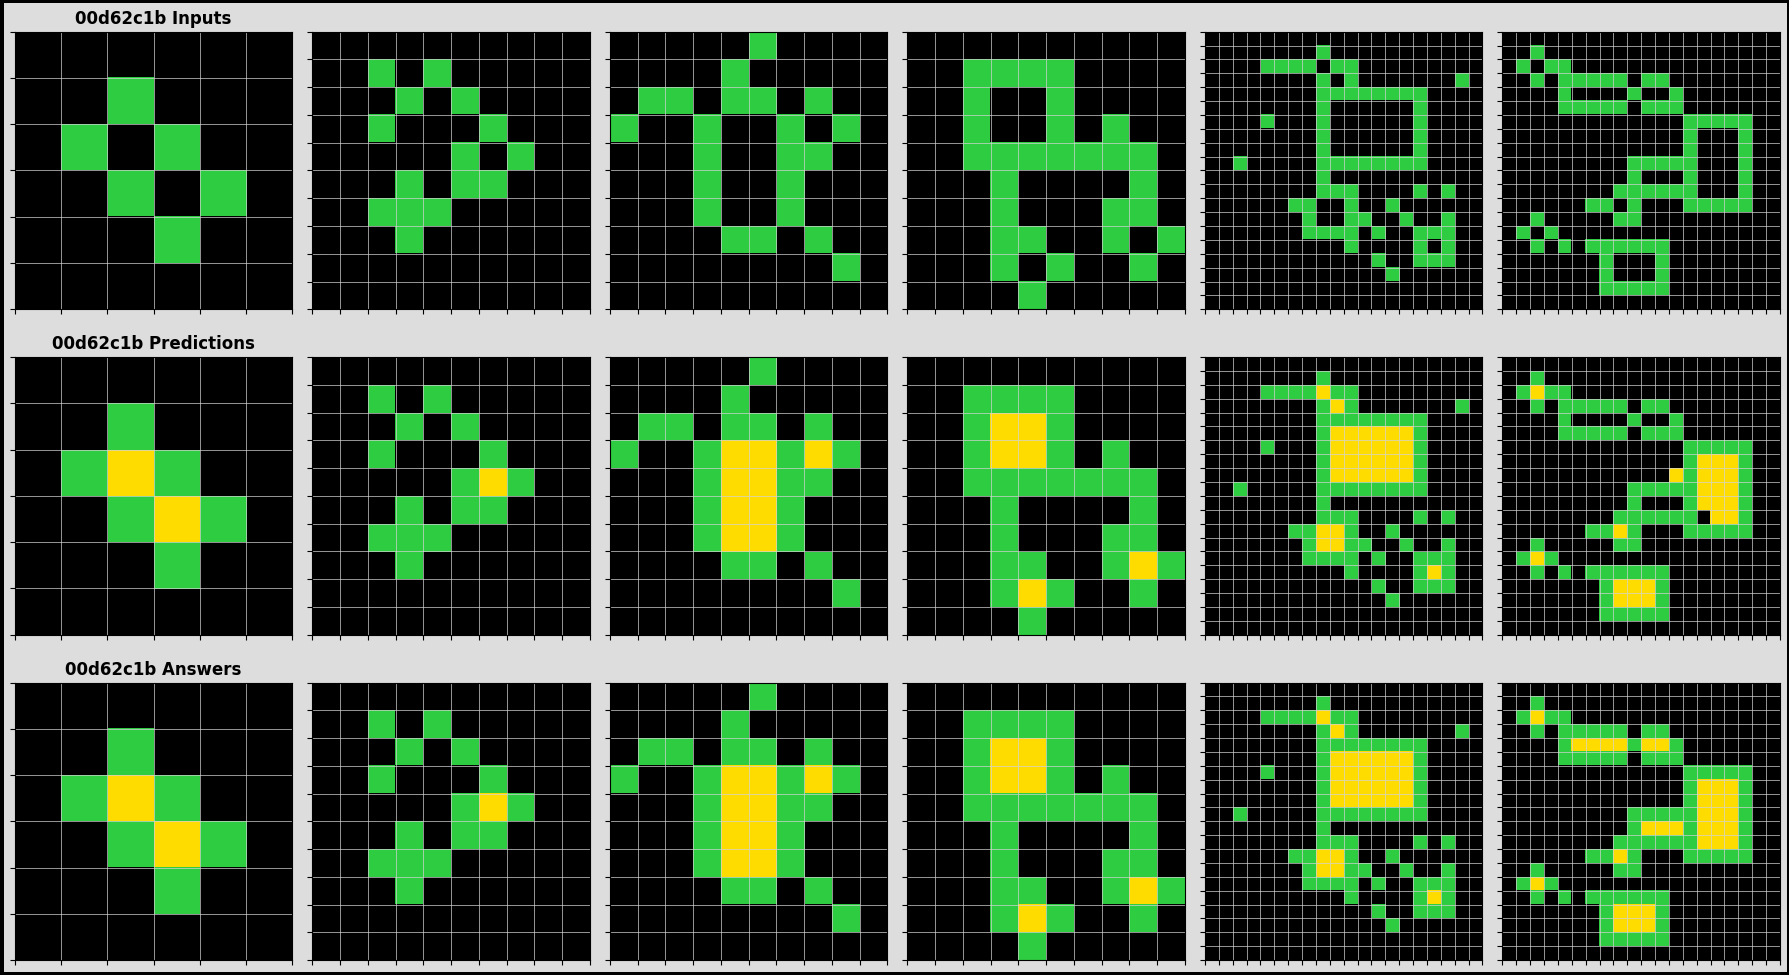

In [13]:
config = load_test_config()
config.model_path = './output/model_ShapeStableSolver.pth'
test(config)

# Step 3: Customize the model

## Model which only predicts the positions to be substituted

In [14]:
import torch
from torch import nn

from arc_prize.model_components.convfixedkernel import Conv2dEncoderLayer
from utils.visualize import plot_kernels_and_outputs
from arc_prize.model_components.attention import ReductiveAttention


class ConvFeatureExtractor(nn.Module):
    def __init__(self, pad_value=-1, reduced_channels_encoder=[512, 128, 32], reduced_channels_decoder=[128, 32], recursion=3):
        super().__init__()
        self.recursion = recursion
        self.encoder = Conv2dEncoderLayer(1, reduced_channels_encoder, pad_value=pad_value, fixed_kernel=True)
        self.extender = Conv2dEncoderLayer(reduced_channels_encoder[-1], reduced_channels_decoder, pad_value=pad_value)
        self.decoder = Conv2dEncoderLayer(reduced_channels_decoder[-1], reduced_channels_decoder, pad_value=pad_value, out_one_channel=True)
        self.attn_reduction = ReductiveAttention()
        self.attn_h = nn.Parameter(torch.randn(reduced_channels_decoder[-1]))

    def forward(self, x):
        N, C, H, W = x.shape
        x = x.transpose(1, 0) # [C, N, H, W]

        x_list = []
        for i, x_c in enumerate(x):
            if not torch.any(x_c == 1):
                x_c = x_c.unsqueeze(0) + 1 # .fill_(1) # default value is 0
                x_list.append(x_c)
                continue

            x_c = x_c.view(N, 1, H, W)
            x_c = self.encoder(x_c) # [N, V, H, W]
            x_c_seqs = []
            for _ in range(self.recursion): ### Depends on Input Shape
                x_c = self.extender(x_c) # [N, V, H, W]
                x_c_seqs.append(x_c.unsqueeze(0))
            x_c_seqs = torch.cat(x_c_seqs) # [S, N, V, H, W]

            S, N, V, H, W = x_c_seqs.shape
            x_c_seqs = x_c_seqs.permute(1, 3, 4, 0, 2).view(N*H*W, S, V)
            x_c = self.attn_reduction(x_c_seqs, self.attn_h.repeat(N*H*W, 1)).view(N, H, W, V).permute(0, 3, 1, 2)
            x_c = self.decoder(x_c).view(N, H, W) # [1, N, H, W]
            x_list.append(x_c.unsqueeze(0))

        x = torch.cat(x_list) 

        return x.transpose(1, 0) # [N, C, H, W]
        
    def to(self, *args, **kwargs):
        self.encoder = self.encoder.to(*args, **kwargs)
        return super().to(*args, **kwargs)


class ShapeStableSolverIgnoreColor(nn.Module):
    def __init__(self, pad_value=-1, reduced_channels_encoder=[512, 128, 32], reduced_channels_decoder=[128, 32], n_classes=10, hidden_size=64):
        super().__init__()
        self.feature_extractor = ConvFeatureExtractor(pad_value, reduced_channels_encoder, reduced_channels_decoder)

    def forward(self, x):
        N, C, H, W = x.shape

        x = self.feature_extractor(x) # [N, C, H, W]
        y_source = x[:, 1:].sum(dim=1).view(N, H, W)

        return y_source

    def to(self, *args, **kwargs):
        self.feature_extractor = self.feature_extractor.to(*args, **kwargs)
        return super().to(*args, **kwargs)


In [15]:
model_class = ShapeStableSolverIgnoreColor
config = load_train_config(ignore_color=True)
config.model.params.reduced_channels_encoder = [512, 16]
config.model.params.reduced_channels_decoder = [16, 16]

train(config, model_class) # Apply custom model

data:
  name: ShapeStableSolverIgnoreColor
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: true
    ignore_color: true
model:
  name: ShapeStableSolverIgnoreColor
  params:
    reduced_channels_encoder:
    - 512
    - 16
    reduced_channels_decoder:
    - 16
    - 16
train:
  name: default
  params:
    epoch: 50
    lr: 0.01
defaults:
- data: ShapeStableSolver_train
- model: ShapeStableSolver
- train: default
save_path: ./output/

┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type                         ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model          │ ShapeStableSolverIgnoreColor │ 13.4 K │ train │
│ 1 │ loss_fn_source │ BCEWithLogitsLoss            │      0 │ train │
└───┴────────────────┴──────────────────────────────┴────────┴───────┘

Trainable params: 13.4 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 13.4 K                                                                                               
Total estimated model params size (MB): 0

Output()

Train loss: 23.655636, N Pixels Wrong: 1500

Train loss: 21.656189, N Pixels Wrong: 1353

Train loss: 21.073490, N Pixels Wrong: 865

Train loss: 20.066210, N Pixels Wrong: 530

Train loss: 19.726398, N Pixels Wrong: 389

Train loss: 19.395267, N Pixels Wrong: 249

Train loss: 19.077515, N Pixels Wrong: 197

Train loss: 18.864090, N Pixels Wrong: 114

Train loss: 19.367710, N Pixels Wrong: 271

Train loss: 19.163692, N Pixels Wrong: 191

Train loss: 18.940065, N Pixels Wrong: 111

Train loss: 18.803715, N Pixels Wrong: 56

Train loss: 18.760511, N Pixels Wrong: 39

Train loss: 18.748713, N Pixels Wrong: 19

Train loss: 18.724222, N Pixels Wrong: 16

Train loss: 18.712151, N Pixels Wrong: 9

Train loss: 18.711630, N Pixels Wrong: 5

Train loss: 18.708937, N Pixels Wrong: 1

Train loss: 18.707123, N Pixels Wrong: 3

Train loss: 18.705965, N Pixels Wrong: 0

Train loss: 18.701986, N Pixels Wrong: 0

Train loss: 18.700855, N Pixels Wrong: 0

Train loss: 18.700569, N Pixels Wrong: 2

Train loss: 18.699688, N Pixels Wrong: 0

Train loss: 18.699780, N Pixels Wrong: 0

Train loss: 18.699097, N Pixels Wrong: 0

Train loss: 18.697210, N Pixels Wrong: 0

Train loss: 18.697899, N Pixels Wrong: 0

Train loss: 18.696516, N Pixels Wrong: 0

Train loss: 18.696545, N Pixels Wrong: 0

Train loss: 18.695715, N Pixels Wrong: 0

Train loss: 18.694962, N Pixels Wrong: 0

Train loss: 18.695383, N Pixels Wrong: 0

Train loss: 18.695364, N Pixels Wrong: 0

Train loss: 18.696072, N Pixels Wrong: 0

Train loss: 18.695738, N Pixels Wrong: 0

Train loss: 18.694799, N Pixels Wrong: 0

Train loss: 18.695839, N Pixels Wrong: 0

Train loss: 18.695108, N Pixels Wrong: 0

Train loss: 18.697598, N Pixels Wrong: 0

Train loss: 18.696964, N Pixels Wrong: 0

Train loss: 18.697422, N Pixels Wrong: 0

Train loss: 18.697763, N Pixels Wrong: 1

Train loss: 18.697020, N Pixels Wrong: 0

Train loss: 18.699707, N Pixels Wrong: 0

Train loss: 18.698828, N Pixels Wrong: 2

Train loss: 18.700518, N Pixels Wrong: 3

Train loss: 18.698936, N Pixels Wrong: 0

Train loss: 18.699392, N Pixels Wrong: 2

Train loss: 18.702602, N Pixels Wrong: 3

Seed used 5719744587189226229

Model saved to: ./output//model_ShapeStableSolverIgnoreColor.pth

ShapeStableSolverIgnoreColorL(
  (model): ShapeStableSolverIgnoreColor(
    (feature_extractor): ConvFeatureExtractor(
      (encoder): Conv2dEncoderLayer(
        (conv): Conv2dFixedKernel(1, 512, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=512, out_features=16, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (extender): Conv2dEncoderLayer(
        (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=16, out_features=16, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (decoder): Conv2dEncoderLayer(
        (conv): Conv2d(16, 16, kernel_size=(3, 3), st

## Source Code of the Latest Model

In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from itertools import product
from torch.nn.modules.conv import _size_2_t, Union


class Conv2dFixedKernel(nn.Conv2d):
    def __init__(
        self, 
        in_channels: int,
        kernel_size: _size_2_t,
        stride: _size_2_t = 1,
        padding: Union[str, _size_2_t] = 0,
        dilation: _size_2_t = 1,
        groups: int = 1,
        bias: bool = False,
        padding_mode: str = 'zeros',
        device=None,
        dtype=None,
        weight=None, 
        update=False
    ):
        if weight is None:
            weight, out_channels, biases = self.generate_all_possible_NxM_kernels(kernel_size, device=device, dtype=dtype)
        else:
            out_channels = weight.shape[0]
            biases = self.generate_biases(weight)

        super().__init__(
            in_channels, out_channels, 
            kernel_size, stride, padding, dilation, groups, bias, padding_mode, 
            device, dtype
        )

        # Remove the default weight parameter
        del self._parameters['weight']
        del self._parameters['bias']
        
        if update:
            # Register weight as a parameter for updates
            param = nn.Parameter(weight)
            self.register_parameter('weight', param)
            
            self.bias = nn.Parameter(biases, requires_grad=update)
            self.register_parameter('bias', self.bias)
        else:
            # Set fixed weight
            self.weight = weight
            self.bias = biases

    def to(self, *args, **kwargs):
        self.weight = self.weight.to(*args, **kwargs)
        self.bias = self.bias.to(*args, **kwargs)
        return super().to(*args, **kwargs)

    @staticmethod
    def generate_all_possible_NxM_kernels(kernel_size=(3, 3), device=None, dtype=None):
        '''Generate all possible n x m kernels with values 0 and 1'''
        weight_values = [0.0, 1.0]
        repeat = kernel_size[0] * kernel_size[1]
        # Generate all possible combinations of kernel values
        weight_custom = torch.cat(
            [torch.tensor(kernel, dtype=dtype, device=device).reshape(1, 1, kernel_size[0], kernel_size[1]) 
             for kernel in product(weight_values, repeat=repeat)], dim=0)

        out_channels = len(weight_values) ** repeat
        
        # Generate corresponding biases
        biases = -(torch.sum(weight_custom, dim=(2, 3)) - 1).reshape(out_channels).to(device=device, dtype=dtype)
        
        return weight_custom, out_channels, biases

    @staticmethod
    def generate_biases(weight):
        '''Generate biases based on weight patterns'''
        return -(torch.sum(weight, dim=(2, 3)) - 1).reshape(weight.shape[0])


class Conv2dEncoderLayer(nn.Module):
    def __init__(self, in_channels=1, reduced_channels=[512, 32], fixed_kernel=False, out_one_channel=False, kernel_size=(3, 3), stride=1, padding=1, pad_value=-1):
        super().__init__()
        self.padding = padding
        self.pad_value = pad_value

        if fixed_kernel:
            self.conv = Conv2dFixedKernel(in_channels, kernel_size=kernel_size, stride=stride, padding=0)
        else:
            self.conv = nn.Conv2d(in_channels, reduced_channels[0], kernel_size=kernel_size, stride=stride, padding=0, bias=True)
        self.activation = nn.ReLU()

        self.linear_layers = nn.Sequential()
        for i in range(len(reduced_channels)-1):
            self.linear_layers.add_module(f'linear_{i}', nn.Linear(reduced_channels[i], reduced_channels[i+1], bias=False))
            self.linear_layers.add_module(f'relu_{i}', nn.ReLU())
            
        if out_one_channel:
            self.linear_layers.add_module('out', nn.Linear(reduced_channels[-1], 1, bias=False))

        self.norm = nn.InstanceNorm2d(reduced_channels[-1])

    def forward(self, x):
        N, H, W = x.shape[0], x.shape[2], x.shape[3]
        x = F.pad(x, (self.padding, self.padding, self.padding, self.padding), mode='constant', value=self.pad_value)
        x = self.activation(self.conv(x)) # [N, C, H, W]
        x = x.permute(0, 2, 3, 1).reshape(N*H*W, -1) # [N*H*W, C]
        x = self.linear_layers(x)
        x = x.view(N, H, W, -1).permute(0, 3, 1, 2)
        x = self.norm(x)

        return x

    def to(self, *args, **kwargs):
        self.conv = self.conv.to(*args, **kwargs)
        return super().to(*args, **kwargs)

In [17]:
# https://github.com/oreilly-japan/deep-learning-from-scratch-2/blob/master/ch08/attention_seq2seq.py

class AttentionWeight(nn.Module):
    def __init__(self):
        super(AttentionWeight, self).__init__()

    def forward(self, hs, h):
        # hs: batch_size x seq_len x hidden_dim
        # h: batch_size x hidden_dim
        # Expanding h to match hs's dimensions for batch-wise multiplication
        hr = h.unsqueeze(1)  # shape: batch_size x 1 x hidden_dim
        t = hs * hr
        s = torch.sum(t, dim=2)  # Sum across hidden_dim
        a = F.softmax(s, dim=1)  # Apply softmax across seq_len
        return a

class WeightSum(nn.Module):
    def __init__(self):
        super(WeightSum, self).__init__()

    def forward(self, hs, a):
        # hs: batch_size x seq_len x hidden_dim
        # a: batch_size x seq_len
        # Need to expand a for element-wise multiplication
        ar = a.unsqueeze(2)  # shape: batch_size x seq_len x 1
        t = hs * ar
        c = torch.sum(t, dim=1)  # Sum across seq_len
        return c

class ReductiveAttention(nn.Module):
    def __init__(self):
        super(ReductiveAttention, self).__init__()
        self.attention_weight_layer = AttentionWeight()
        self.weight_sum_layer = WeightSum()

    def forward(self, hs, h):
        # hs: batch_size x seq_len x hidden_dim
        # h: batch_size x hidden_dim
        a = self.attention_weight_layer(hs, h)
        out = self.weight_sum_layer(hs, a)
        return out

In [18]:
class ConvSameColorFeatureExtractor(nn.Module):
    def __init__(self, pad_value=-1, reduced_channels_encoder=[512, 32], reduced_channels_decoder=[512, 32], hidden_dim=16, out_dim=4):
        super().__init__()
        self.out_dim = out_dim
        self.V = reduced_channels_encoder[-1]
        self.encoder = Conv2dEncoderLayer(1, reduced_channels_encoder, pad_value=pad_value, fixed_kernel=True)
        self.extender = Conv2dEncoderLayer(reduced_channels_encoder[-1], reduced_channels_decoder, pad_value=pad_value)
        self.attn_reduction = ReductiveAttention()
        self.attn_h = nn.Parameter(torch.randn(self.V))

        self.decoder = nn.Sequential(
            nn.Linear(self.V, out_dim, bias=True),
        )

    def forward(self, x):
        N, C, H, W = x.shape
        x = x.transpose(1, 0) # [C, N, H, W]

        x_list = []
        for i, x_c in enumerate(x):
            if not torch.any(x_c == 1):
                x_c = (x_c.view(1, N, 1, H, W) + 1).repeat(1, 1,  self.out_dim, 1, 1) # default value is -1 so add 1 to make zero
                x_list.append(x_c)
                continue

            x_c = x_c.view(N, 1, H, W)
            x_c = self.encoder(x_c) # [N, V, H, W]

            features_time = []
            features_time.append(x_c.unsqueeze(0))

            for _ in range(max(H, W)//2+1): ### Varialble (Depends on Input Shape)
                x_c = self.extender(x_c) # [N, V, H, W]
                features_time.append(x_c.unsqueeze(0))
            features_time = torch.cat(features_time) # [S, N, V, H, W]

            S, N, V, H, W = features_time.shape
            features_time = features_time.permute(1, 3, 4, 0, 2).view(N*H*W, S, V)
            feature = self.attn_reduction(features_time, self.attn_h.repeat(N*H*W, 1))

            x_c = self.decoder(feature)  # [N*H*W, V]
            x_c = x_c.view(N, H, W, self.V).permute(0, 3, 1, 2)
            x_list.append(x_c.unsqueeze(0)) # [1, N, V, H, W]

        x = torch.cat(x_list) # [C, N, V, H, W]
        return x
        
    def to(self, *args, **kwargs):
        self.encoder = self.encoder.to(*args, **kwargs)
        return super().to(*args, **kwargs)


class ShapeStableSolver(nn.Module):
    def __init__(self, pad_value=-1, reduced_channels_encoder=[512, 32], reduced_channels_decoder=[128, 32], num_classes=10, feature_dim=32):
        super().__init__()
        self.feature_extractor = ConvSameColorFeatureExtractor(pad_value, reduced_channels_encoder, reduced_channels_decoder, out_dim=feature_dim)

        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=num_classes, nhead=1, dim_feedforward=128, batch_first=True, bias=True),
            num_layers=1,
        )

        self.attn_input = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(d_model=num_classes, nhead=1, dim_feedforward=1, batch_first=True, bias=False),
            num_layers=1,
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(feature_dim, 1, bias=False),
            nn.BatchNorm1d(1),
        )

    def forward(self, x):
        N, C, H, W = x.shape
        feature = self.feature_extractor(x) # [C, N, V, H, W]
        V = feature.shape[2]
        feature = feature.permute(1, 3, 4, 0, 2).reshape(N*H*W, C, V) # [N*H*W, C, V]

        y = feature
        y = y.transpose(2, 1)
        y = self.encoder(y)

        x = x.permute(0, 2, 3, 1).reshape(N*H*W, 1, C).repeat(1, V, 1) # [N*H*W, V, C]
        y = self.attn_input(y, x) # [N*H*W, V, C]
        y = y.transpose(2, 1)

        y = y.reshape(N*H*W*C, V)
        y = self.decoder(y) # [N*H*W*C, 1]
        y = y.view(N, H, W, C).permute(0, 3, 1, 2) # [N, C, H, W]

        return y

    def to(self, *args, **kwargs):
        self.feature_extractor = self.feature_extractor.to(*args, **kwargs)
        return super().to(*args, **kwargs)


data:
  name: ShapeStableSolver
  params:
    base_path: /kaggle/input/arc-prize-2024/
    batch_size: 1
    cold_value: -1
    augment_data: true
    ignore_color: false
model:
  name: ShapeStableSolver
  params:
    reduced_channels_encoder:
    - 512
    - 32
    reduced_channels_decoder:
    - 32
    - 32
train:
  name: default
  params:
    epoch: 50
    lr: 0.01
defaults:
- data: ShapeStableSolver_train
- model: ShapeStableSolver
- train: default
save_path: ./output/

┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name           ┃ Type              ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ model          │ ShapeStableSolver │ 31.8 K │ train │
│ 1 │ loss_fn_source │ BCEWithLogitsLoss │      0 │ train │
└───┴────────────────┴───────────────────┴────────┴───────┘

Trainable params: 31.8 K                                                                                           
Non-trainable params: 0                                                                                            
Total params: 31.8 K                                                                                               
Total estimated model params size (MB): 0

Output()

Train loss: 16.820835, N Pixels Wrong: 966

Train loss: 11.250612, N Pixels Wrong: 382

Train loss: 8.296906, N Pixels Wrong: 381

Train loss: 6.531673, N Pixels Wrong: 372

Train loss: 5.112446, N Pixels Wrong: 301

Train loss: 4.069358, N Pixels Wrong: 249

Train loss: 3.272097, N Pixels Wrong: 186

Train loss: 2.716528, N Pixels Wrong: 156

Train loss: 2.350699, N Pixels Wrong: 140

Train loss: 1.931650, N Pixels Wrong: 76

Train loss: 1.623155, N Pixels Wrong: 60

Train loss: 1.393553, N Pixels Wrong: 33

Train loss: 1.494130, N Pixels Wrong: 156

Train loss: 1.359627, N Pixels Wrong: 120

Train loss: 1.112061, N Pixels Wrong: 73

Train loss: 0.939002, N Pixels Wrong: 44

Train loss: 0.832735, N Pixels Wrong: 39

Train loss: 0.753878, N Pixels Wrong: 30

Train loss: 0.695828, N Pixels Wrong: 33

Train loss: 0.636164, N Pixels Wrong: 22

Train loss: 0.589237, N Pixels Wrong: 24

Train loss: 0.551214, N Pixels Wrong: 18

Train loss: 0.487959, N Pixels Wrong: 6

Train loss: 0.452136, N Pixels Wrong: 5

Train loss: 0.417254, N Pixels Wrong: 0

Train loss: 0.390259, N Pixels Wrong: 0

Train loss: 0.366386, N Pixels Wrong: 0

Train loss: 0.344879, N Pixels Wrong: 0

Train loss: 0.325517, N Pixels Wrong: 0

Train loss: 0.307543, N Pixels Wrong: 0

Train loss: 0.291045, N Pixels Wrong: 0

Train loss: 0.275892, N Pixels Wrong: 0

Train loss: 0.262014, N Pixels Wrong: 0

Train loss: 0.249086, N Pixels Wrong: 0

Train loss: 0.237051, N Pixels Wrong: 0

Train loss: 0.225998, N Pixels Wrong: 0

Train loss: 0.215786, N Pixels Wrong: 0

Train loss: 0.206024, N Pixels Wrong: 0

Train loss: 0.196882, N Pixels Wrong: 0

Train loss: 0.188552, N Pixels Wrong: 0

Train loss: 0.180767, N Pixels Wrong: 0

Train loss: 0.173339, N Pixels Wrong: 0

Train loss: 0.169627, N Pixels Wrong: 0

Train loss: 0.160966, N Pixels Wrong: 0

Train loss: 0.153568, N Pixels Wrong: 0

Train loss: 0.147597, N Pixels Wrong: 0

Train loss: 0.142025, N Pixels Wrong: 0

Train loss: 0.136654, N Pixels Wrong: 0

Train loss: 0.131661, N Pixels Wrong: 0

Train loss: 0.126948, N Pixels Wrong: 0

Seed used 835715570385551938

Model saved to: ./output//model_ShapeStableSolver.pth

ShapeStableSolverL(
  (model): ShapeStableSolver(
    (feature_extractor): ConvSameColorFeatureExtractor(
      (encoder): Conv2dEncoderLayer(
        (conv): Conv2dFixedKernel(1, 512, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=512, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (extender): Conv2dEncoderLayer(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
        (activation): ReLU()
        (linear_layers): Sequential(
          (linear_0): Linear(in_features=32, out_features=32, bias=False)
          (relu_0): ReLU()
        )
        (norm): InstanceNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      )
      (attn_reduction): ReductiveAttention(
        (attention_weight_layer): AttentionWeight()
        (weight_sum_layer): WeightSum()
      )
      (decoder): Sequential(
        (0): Linear(in_features=32, out_features=32, bias=True)
      )
    )
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=10, out_features=10, bias=True)
          )
          (linear1): Linear(in_features=10, out_features=128, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=128, out_features=10, bias=True)
          (norm1): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (attn_input): TransformerDecoder(
      (layers): ModuleList(
        (0): TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=10, out_features=10, bias=False)
          )
          (multihead_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=10, out_features=10, bias=False)
          )
          (linear1): Linear(in_features=10, out_features=1, bias=False)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=1, out_features=10, bias=False)
          (norm1): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
          (dropout3): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): Sequential(
      (0): Linear(in_features=32, out_features=1, bias=False)
      (1): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (loss_fn_source): BCEWithLogitsLoss()
)

Task: 00d62c1b, index: 1, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 2, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 3, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 4, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 5, correct 100.0%, N Pixels Wrong: 0

Task: 00d62c1b, index: 6, correct 96.75%, N Pixels Wrong: 13

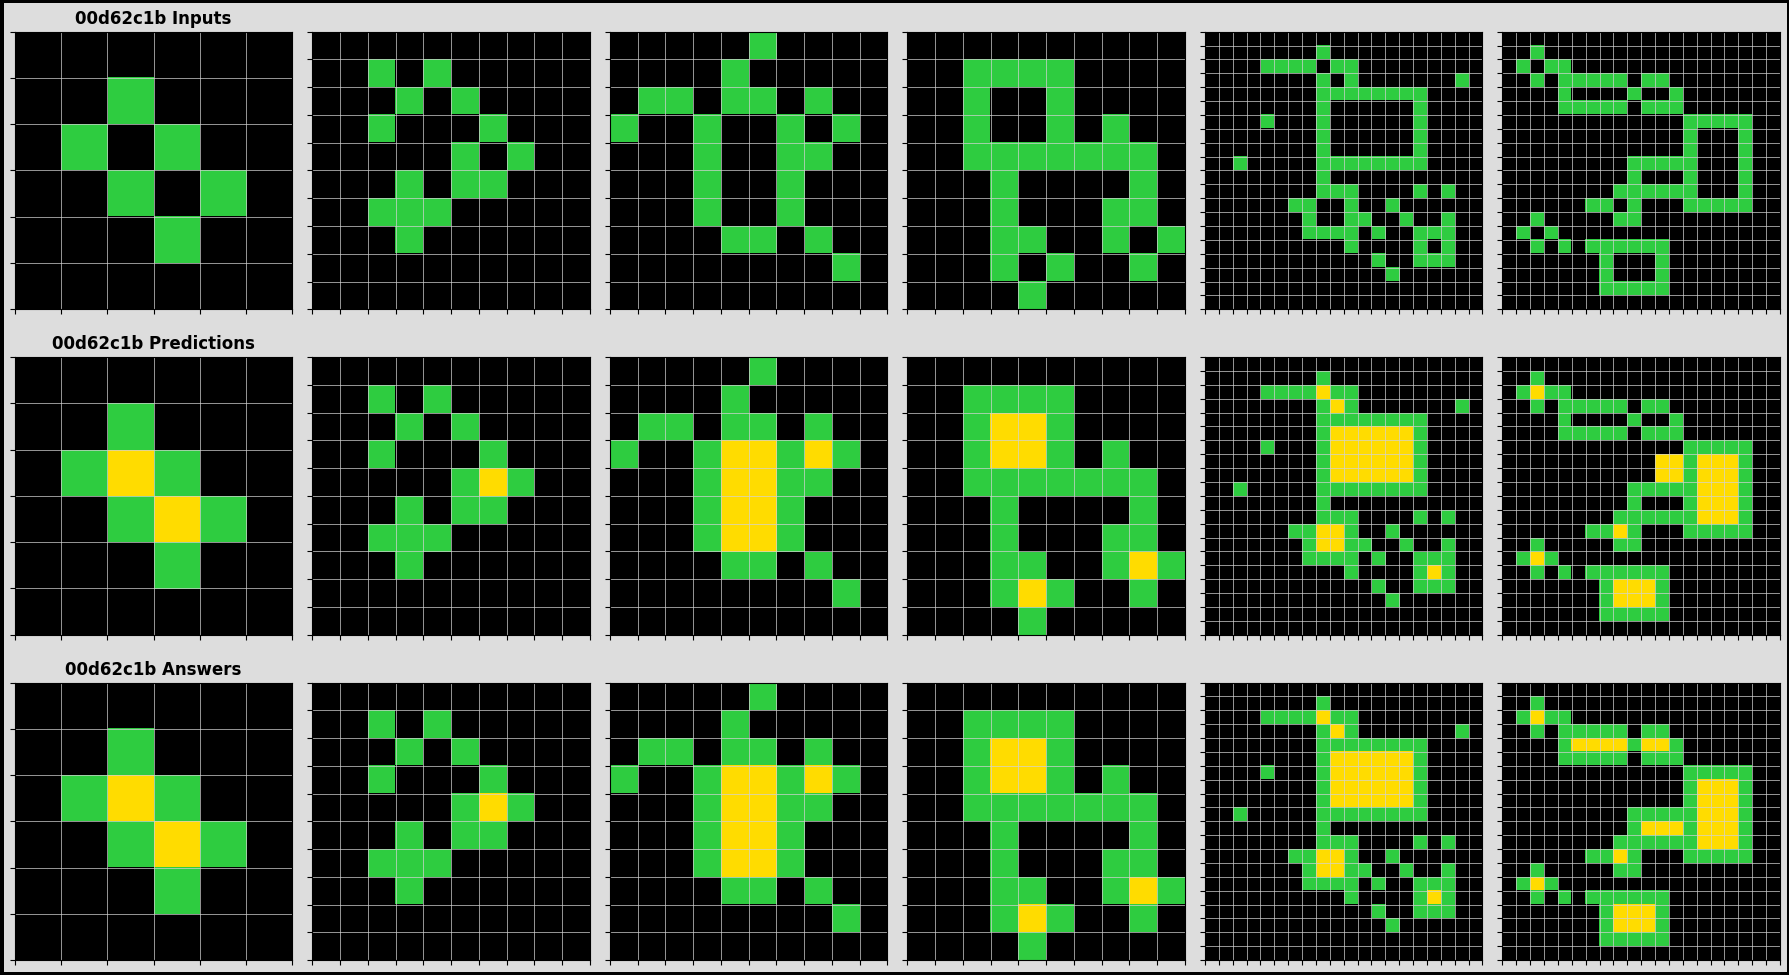

In [19]:
config = load_train_config()
model = train(config, ShapeStableSolver) # Apply custom model
print(model)
config = load_test_config()
test(config, model)